<a href="https://colab.research.google.com/github/AjmalSarwary/invest_ml/blob/master/code/eff_front.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The dataset "ind30_m_vw_rets"
 represents monthly returns of 30 different industry portfolios fom 1926 onward.**

In [44]:
!git clone https://github.com/ajmalsarwary/invest_ml.git

fatal: destination path 'invest_ml' already exists and is not an empty directory.


In [45]:
%cd /content/invest_ml

/content/invest_ml


In [46]:
!git pull origin master

From https://github.com/ajmalsarwary/invest_ml
 * branch            master     -> FETCH_HEAD
Already up to date.


In [47]:
import sys
sys.path.append('/content/invest_ml/code')

In [48]:
import invest_risk_kit as rk
import pandas as pd

In [49]:
file_path = '/content/invest_ml/data/ind30_m_vw_rets.csv'
ind = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)
ind = ind/100

In [50]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [51]:
ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')

In [52]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [53]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [54]:
ind.columns = ind.columns.str.strip()

<Axes: >

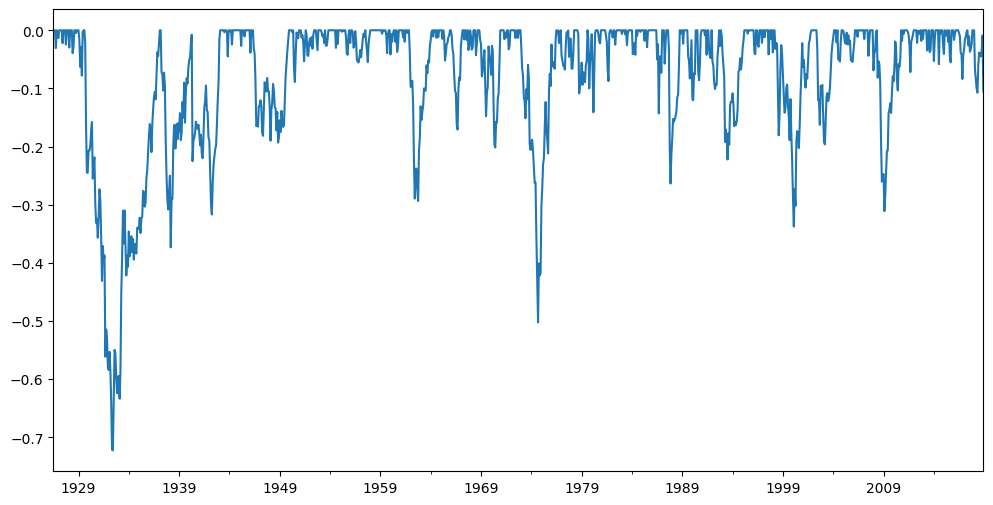

In [55]:
rk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [56]:
cols_of_interest=["Food", "Smoke", "Coal", "Beer", "Fin"]
rk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [57]:
# top 5 portfolios with highest Corinish-Fisher VaR
rk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [58]:
# top 5 portfolios with lowest Cornish-Fisher VaR
rk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<Axes: title={'center': 'Industry Cornish-Fisher VaR 1926-2018'}>

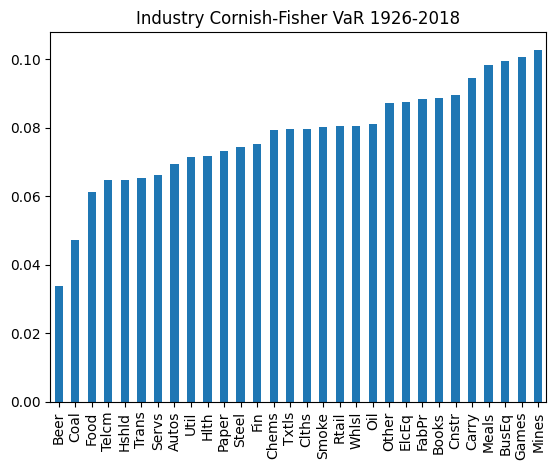

In [59]:
# Industry Cornish-Fisher VaR 1926-2018
rk.var_gaussian(ind, modified=True).sort_values().plot.bar(title="Industry Cornish-Fisher VaR 1926-2018")

<Axes: title={'center': 'Industry Sharpe Ratios from 2000-2018'}>

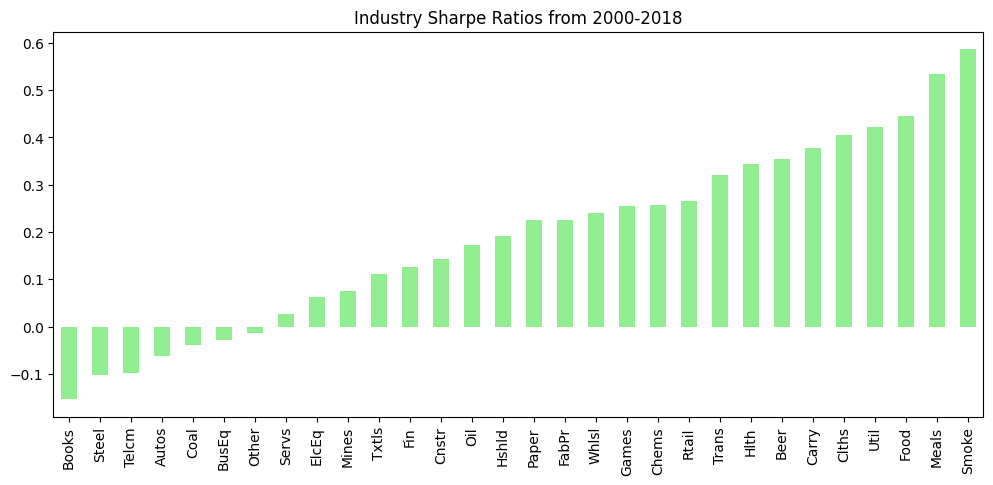

In [60]:
# Industry Sharpe Ratios from 2000-2018
rk.sharpe_ratio(ind["2000":], 0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratios from 2000-2018", figsize=(12,5), color="lightgreen")

.

.

$$ \text{Annualized Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right)^{\frac{p}{n}} - 1 $$
  

*   p is periods_per_year (months=12, weeks=54, days=365)
*   n is the number of periods in the dataset 'ind.shape[0]=1110'
*   subtraction of 1 adjusts the result to reflect the rate of return

$$ \sigma_{\text{annualized}, i} = \sigma_{\text{periodic}, i} \times \sqrt{p} $$













<Axes: >

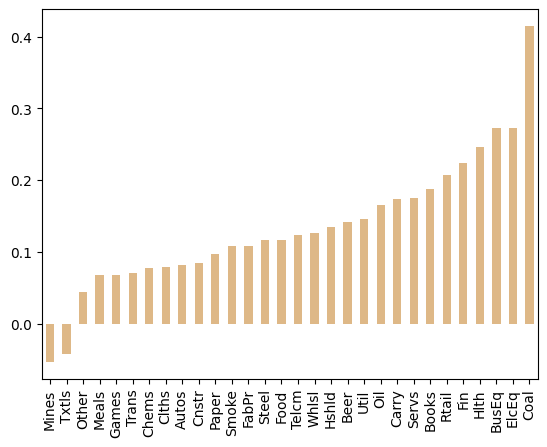

In [61]:
# expected retuns
er = rk.annualize_rets(ind["1996":"2000"], 12)
er.sort_values().plot.bar(color="burlywood")

In [62]:
# expected returns of the industry portfolios
er = rk.annualize_rets(ind["1996":"2000"], 12)

In [63]:
# covariance among industry portfolios
cov = ind["1996":"2000"].cov()

In [64]:
# draw a subset of industry portfolios
sub =["Beer","Food", "Smoke", "Coal"]
# expected retrun for industry portfolios
er[sub]

Beer     0.141126
Food     0.116799
Smoke    0.107830
Coal     0.414689
dtype: float64

In [65]:
# covariance among the subset of the industry portfolios
cov.loc[sub, sub]

,Beer,Food,Smoke,Coal
Beer,0.005264,0.002379,0.001359,0.001728
Food,0.002379,0.002609,0.002061,0.000027
Smoke,0.001359,0.002061,0.008349,-0.000733
Coal,0.001728,0.000027,-0.000733,0.018641


In [66]:
import numpy as np

# weights for sharing the invested amount between the industry portfolios from the subset
weights = np.repeat(1/4,4)
weights

array([0.25, 0.25, 0.25, 0.25])

To create the **efficient frontier** expected retruns and the covariance matrix are needed.


.

$$ E(R_p) = \mathbf{w}^T \mathbf{r} $$




In [67]:
# expected return for the weighted investment in the subset of industry portfolios
rk.portfolio_return(weights, er[sub])

0.19511097196038385

.


$$ \sigma_p = \sqrt{\mathbf{w}^T \mathbf{C} \mathbf{w}} $$

In [69]:
# volatility for the weighted investment in the subset of industry portfolios
rk.portfolio_vol(weights, cov.loc[sub,sub])

0.055059195776437045

#2 Asset Frontier

In [ ]:
# draw another subset of 2 assets
sub2 = ["Games", "Fin"]
# fetch expected returns
er[sub2]

In [71]:
# create 2 weight combinations for the asset allocation
n_points = 20
sub2_weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

<Axes: xlabel='Vol', ylabel='R'>

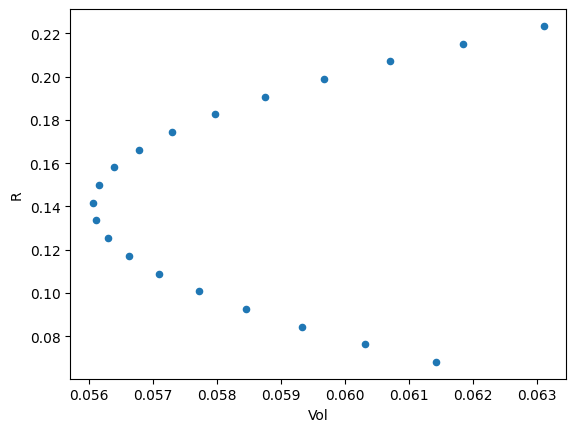

In [72]:
sub2_rets =[rk.portfolio_return(w, er[sub2]) for w in sub2_weights]
sub2_vols =[rk.portfolio_vol(w, cov.loc[sub2,sub2]) for w in sub2_weights]
import pandas as pd
ef = pd.DataFrame({"R": sub2_rets, "Vol":sub2_vols})
ef.plot.scatter(x="Vol", y="R")

<Axes: xlabel='Vols'>

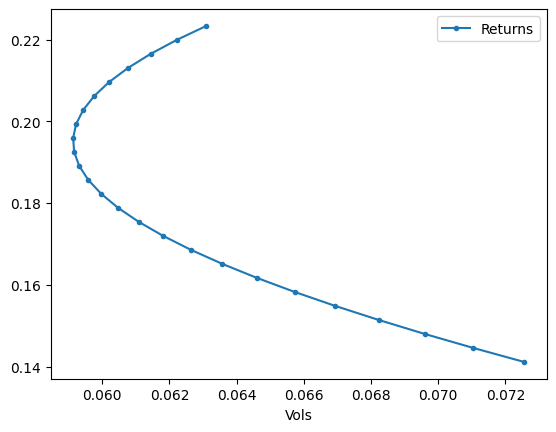

In [73]:
sub3 = ["Fin", "Beer"]
rk.plot_ef2(25, er[sub3], cov.loc[sub3,sub3], ".-")

In [80]:
ind.shape[0]

1110